In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(10 Points)

In [ ]:
# 1. What is the minimum, median, max, and average salary for employee by Married Description and Gender
# Hints: use agg function
# Expected Output as below
# (10 Points)

df = pd.DataFrame(data)
result = df.groupby(['MaritalDesc', 'Sex']).agg(
    min_salary=('Salary', 'min'),
    median_salary=('Salary', 'median'),
    max_salary=('Salary', 'max'),
    avg_salary=('Salary', 'mean')
)
print(result)

                 min_salary  median_salary  max_salary    avg_salary
MaritalDesc Sex                                                     
Divorced    F         45069        59393.0       68182  57345.500000
            M         45115        63738.5      148999  72520.857143
Married     F         45433        62662.0      250000  69638.986111
            M         46120        63370.5      157000  70089.038462
Separated   F         52984        60627.0       66149  60658.888889
            M         64397        70468.0       74417  69760.666667
Single      F         45395        62068.0      220450  68988.266667
            M         46428        63055.5      178000  71340.048387
Widowed     F         45046        63303.5      107226  69719.750000
            M         52788        61359.0       67176  60670.500000


2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(10 Points)

In [ ]:
#code here

df = pd.DataFrame(data)
top5Term = df['TermReason'].value_counts().head(5)

# Convert to DataFrame and rename columns
term_reason_df = top5Term.reset_index()
term_reason_df.columns = ['TermReason', 'total_termination']

# Display the result
print(term_reason_df.to_string(index=False))

       TermReason  total_termination
N/A-StillEmployed                207
 Another position                 20
          unhappy                 14
       more money                 11
    career change                  9


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(10 Points)

In [ ]:
#code here

df = pd.DataFrame(data)
exceeds_df = df[df['PerformanceScore'] == 'Exceeds']
exceeds_df = exceeds_df.groupby('RecruitmentSource').size().reset_index(name='total_recuit').sort_values(by='total_recuit', ascending=False)

print(exceeds_df.to_string(index=False))

 RecruitmentSource  total_recuit
            Indeed            12
          LinkedIn             9
Diversity Job Fair             6
 Employee Referral             5
     CareerBuilder             2
     Google Search             2
           Website             1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(10 Points)

In [ ]:
#code here

manager_counts = df.groupby('Department')['ManagerName'].nunique().reset_index(name='ManagerCount')

print(manager_counts.to_string(index=False))

          Department  ManagerCount
       Admin Offices             3
    Executive Office             1
               IT/IS             6
   Production                   10
               Sales             4
Software Engineering             3


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(10 Points)

In [ ]:
#code here

termination_ratio = df.groupby('Sex')['Termd'].value_counts(normalize=True).sort_index().rename('Termd')

print(termination_ratio)

Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
Name: Termd, dtype: float64


# Create an EDA and Data Visualization Question

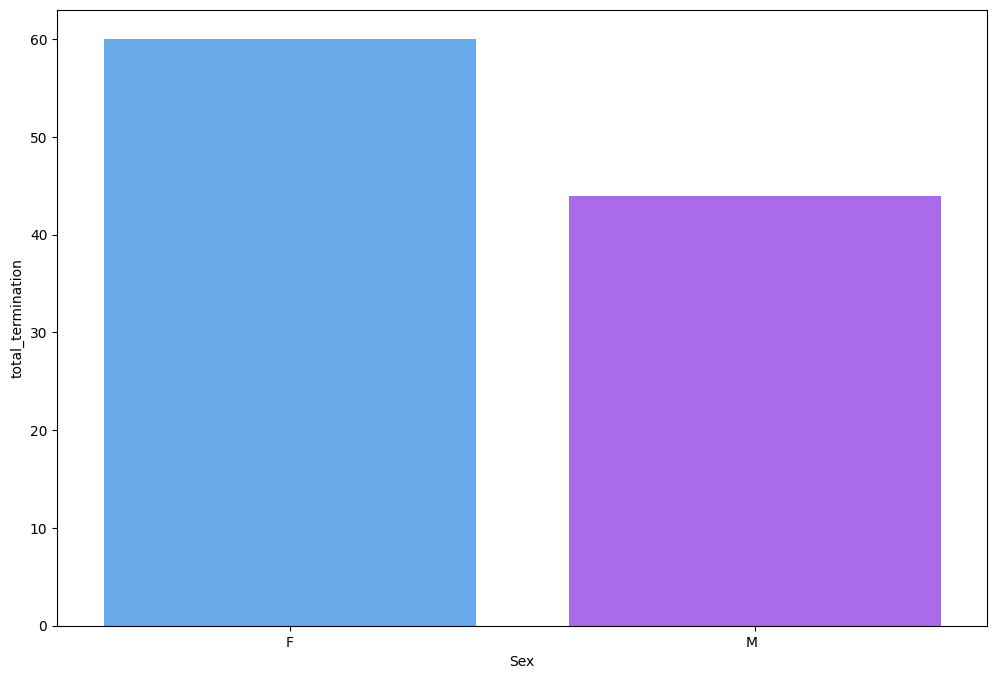

In [ ]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

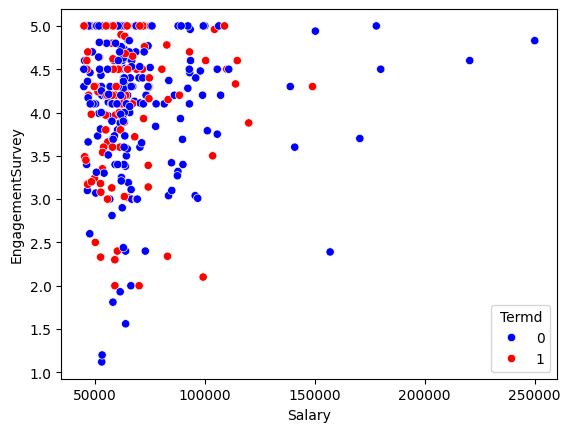

In [ ]:
#code here

colors = {0: 'blue', 1: 'red'}  # Tentukan warna untuk status Termd
sns.scatterplot(x='Salary', y='EngagementSurvey', hue='Termd', palette=colors, data=df)

plt.show()

7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

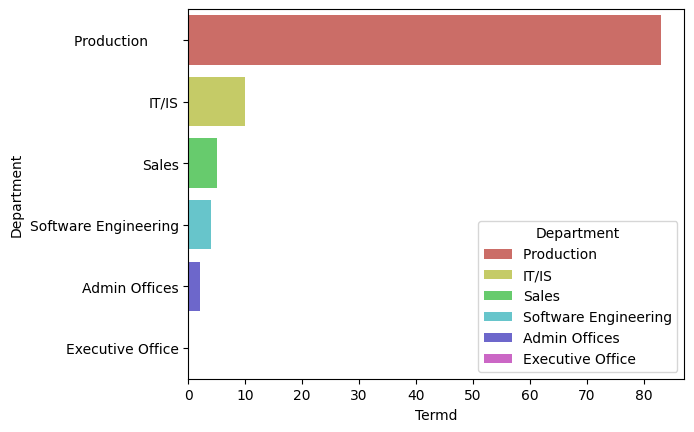

In [ ]:
termination_counts = data.groupby(('Department'))['Termd'].sum().reset_index(name='Termd').sort_values(by='Termd', ascending=False)
sns.barplot(x='Termd', y='Department', data=termination_counts, hue='Department', palette='hls', legend=True)

plt.show()

8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

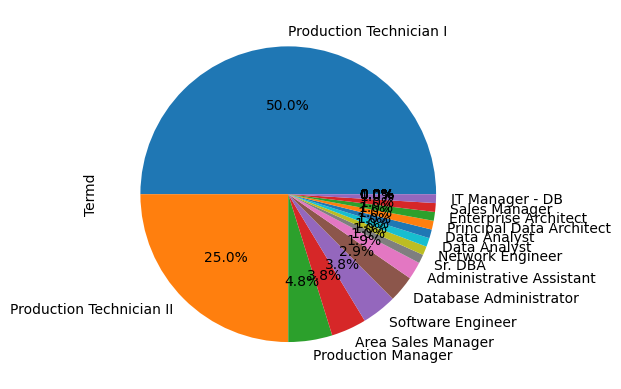

In [ ]:
termination_counts = df.groupby('Position')['Termd'].sum().reset_index(name='Termd').sort_values(by='Termd', ascending=False)

termination_counts.plot.pie(y='Termd', labels=termination_counts['Position'], legend=False, autopct='%1.1f%%')

plt.show()

9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

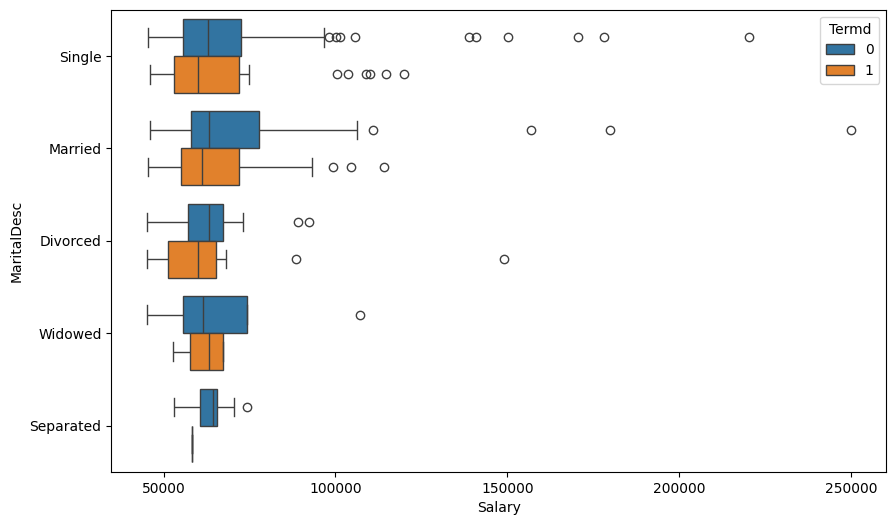

In [ ]:
#code here

salary_count = df.groupby(['MaritalDesc', 'Termd'])['Salary'].sum().reset_index(name='Salary').sort_values(by='Salary', ascending=False)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Salary', y='MaritalDesc', hue='Termd', orient="h")

plt.show()

10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(10 points)

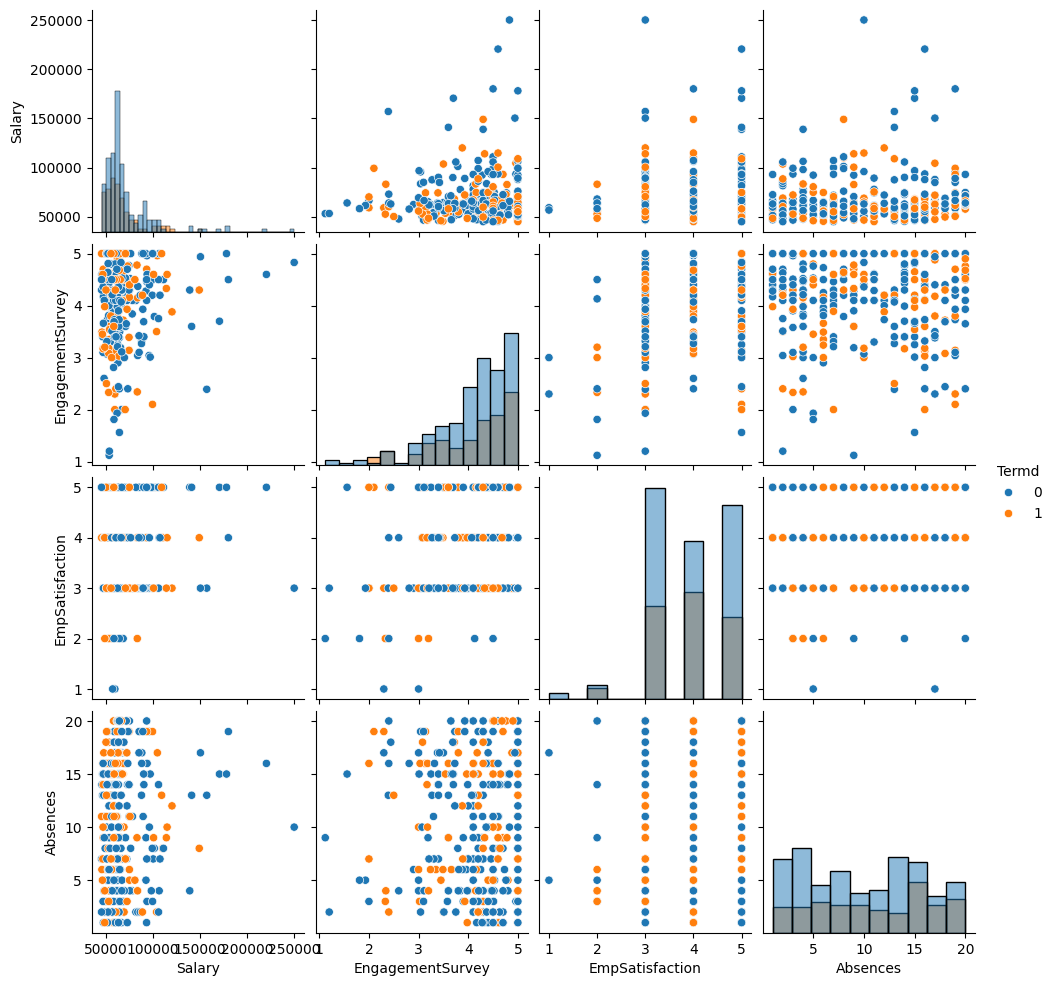

In [ ]:
sns.pairplot(df, vars=['Salary', 'EngagementSurvey', 'EmpSatisfaction', 'Absences'],
             hue='Termd', diag_kind="hist")

plt.show()

# Insight (Answering the Question)

11.	Is there any relationship between who a person works for (their manager) and their performance score? (10 points)<br>
12.	What are our best recruiting sources if we want to ensure a low ratio of termination? (10 points)<br>

...

        ManagerName   PerformanceScore  Count
0   Alex Sweetwater            Exceeds      2
1   Alex Sweetwater        Fully Meets      6
2   Alex Sweetwater  Needs Improvement      1
3   Alex Sweetwater                PIP      0
4          Amy Dunn            Exceeds      3
..              ...                ...    ...
79       Simon Roup                PIP      0
80   Webster Butler            Exceeds      2
81   Webster Butler        Fully Meets     17
82   Webster Butler  Needs Improvement      2
83   Webster Butler                PIP      0

[84 rows x 3 columns]


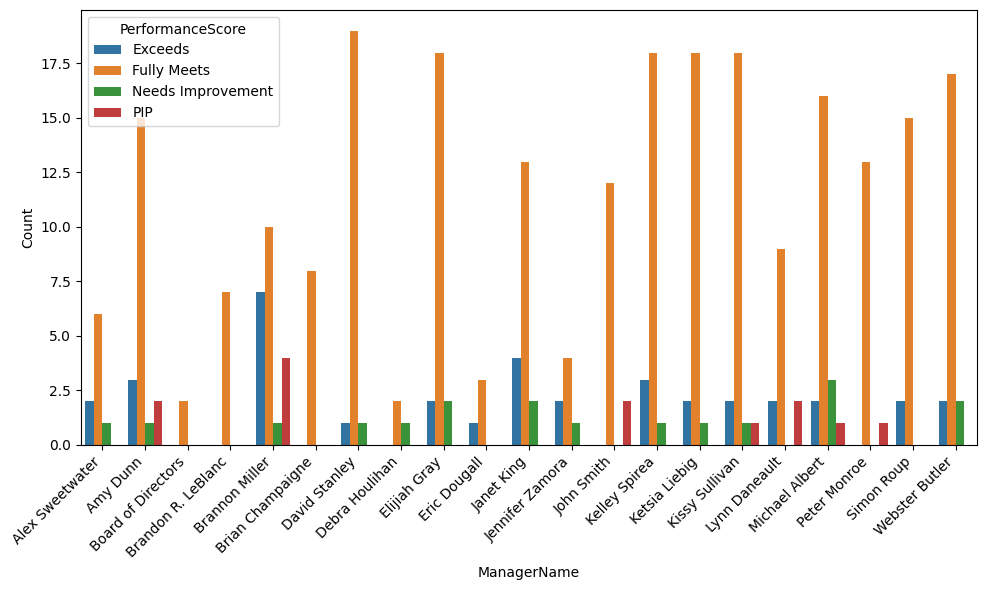

In [ ]:
# 11

result = df.groupby(['ManagerName', 'PerformanceScore']).size().unstack(fill_value=0).stack().reset_index(name='Count')
print(result)

plt.figure(figsize=(10, 6))

sns.barplot(x='ManagerName', y='Count', hue='PerformanceScore', data=result)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

1. Distribusi Skor Kinerja Tergantung pada Manajer:

- Setiap manajer memiliki distribusi kinerja yang berbeda-beda. Misalnya:
 - Alex Sweetwater: Mayoritas karyawan di bawah manajer ini berada di kategori "Fully Meets" (6 karyawan) dan "Exceeds" (2 karyawan), dengan hanya 1 karyawan yang "Needs Improvement". Tidak ada karyawan di bawah program PIP (Performance Improvement Plan).
 - Webster Butler: Sebagian besar karyawannya juga berada di kategori "Fully Meets" (17 karyawan), dengan beberapa di kategori "Exceeds" (2 karyawan) dan "Needs Improvement" (2 karyawan), serta tidak ada yang masuk PIP.

2. Peran Manajer dalam Meningkatkan atau Menjaga Kinerja:

- Manajer seperti Alex Sweetwater dan Webster Butler menunjukkan bahwa karyawan
di bawah manajemen mereka mayoritas berada pada kategori kinerja yang baik ("Fully Meets" atau "Exceeds"). Hal ini bisa menunjukkan bahwa gaya manajemen mereka efektif dalam mendukung kinerja yang optimal.
- Di sisi lain, manajer yang memiliki lebih banyak karyawan di kategori "Needs Improvement" atau "PIP" mungkin perlu mengevaluasi kembali pendekatan mereka dalam mendukung dan memotivasi karyawan.

3. Tidak Ada Manajer dengan Karyawan di Kategori PIP:

- Beberapa manajer, seperti Alex Sweetwater, Amy Dunn, dan Webster Butler, tidak memiliki karyawan yang masuk kategori PIP. Ini dapat menjadi indikator bahwa manajer-manajer ini lebih berhasil dalam mencegah karyawan mereka masuk ke program peningkatan kinerja, yang menunjukkan efektivitas dalam memimpin.

4. Jumlah Karyawan yang Dipegang oleh Manajer Berbeda-beda:

- Penting untuk mempertimbangkan bahwa setiap manajer memiliki jumlah karyawan yang berbeda. Misalnya, Webster Butler memiliki lebih banyak karyawan (21 orang) dibandingkan dengan Alex Sweetwater (9 orang). Hal ini dapat mempengaruhi bagaimana distribusi skor kinerja terlihat dan mempengaruhi interpretasi kinerja dari manajer tersebut.

5. Hubungan Potensial Antara Manajer dan Skor Kinerja:

- Dari data ini, kita dapat mengasumsikan bahwa ada hubungan antara siapa manajer dan kinerja karyawan. Beberapa manajer tampaknya lebih sukses dalam mempertahankan kinerja yang lebih baik di antara karyawannya. Namun, untuk mendapatkan kesimpulan yang lebih kuat, diperlukan analisis statistik lebih lanjut seperti uji korelasi atau chi-square untuk melihat apakah perbedaan ini signifikan secara statistik.

Kesimpulannya, data ini menunjukkan bahwa siapa yang menjadi manajer dapat mempengaruhi kinerja karyawan, tetapi untuk membuktikan adanya hubungan yang kuat dan signifikan, perlu dilakukan analisis lebih mendalam.

      RecruitmentSource Termd  Percentage
          CareerBuilder    No    0.521739
          CareerBuilder   Yes    0.478261
     Diversity Job Fair    No    0.448276
     Diversity Job Fair   Yes    0.551724
      Employee Referral    No    0.838710
      Employee Referral   Yes    0.161290
          Google Search    No    0.387755
          Google Search   Yes    0.612245
                 Indeed    No    0.758621
                 Indeed   Yes    0.241379
               LinkedIn    No    0.763158
               LinkedIn   Yes    0.236842
On-line Web application   Yes    1.000000
                  Other    No    0.500000
                  Other   Yes    0.500000
                Website    No    0.923077
                Website   Yes    0.076923


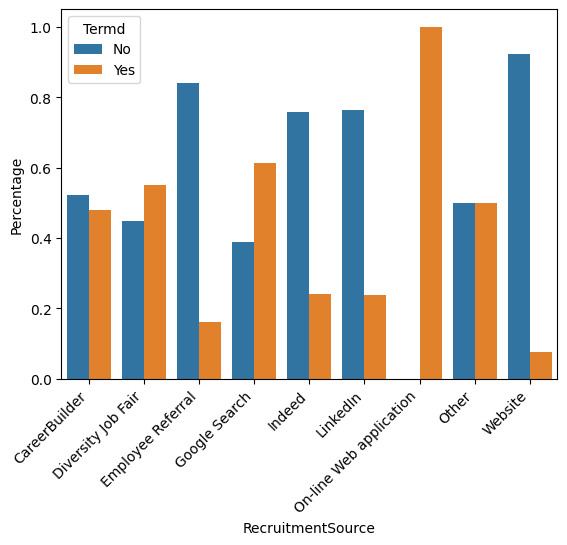

In [ ]:
# 12

termination_ratio = df.groupby('RecruitmentSource')['Termd'].value_counts(normalize=True).sort_index().reset_index(name='Percentage')
termination_ratio['Termd'] = termination_ratio['Termd'].map({0: 'No', 1: 'Yes'})

print(termination_ratio.to_string(index=False))

sns.barplot(x='RecruitmentSource', y='Percentage', hue='Termd', data=termination_ratio)

plt.xticks(rotation=45, ha='right')

plt.show()

Dari Data Diatas didapat bahwa Recuitment Source yang memiliki persentase Termination paling kecil adalah menggunakan Website dengan persentase kecil yaitu 7.6%

1. Website: Recruitment source ini memiliki tingkat terminasi terendah, yaitu hanya 7,6%. Ini menunjukkan bahwa kandidat yang direkrut melalui Website cenderung lebih bertahan dalam pekerjaan dibandingkan sumber lain. Hal ini bisa jadi karena informasi yang lebih komprehensif atau kualifikasi yang lebih sesuai dengan kebutuhan perusahaan.

2. On-line Web Application: Meskipun tingkat terminasi untuk sumber ini adalah 100%, ini berarti semua kandidat yang direkrut dari aplikasi web langsung mengalami terminasi. Angka ini sangat tinggi dan memerlukan evaluasi lebih lanjut, apakah proses seleksi yang digunakan tidak efektif atau mungkin ada faktor lain yang mempengaruhi.

3. Employee Referral: Menariknya, 83,87% dari mereka yang direkrut melalui Employee Referral tidak mengalami terminasi, menjadikannya salah satu metode rekrutmen dengan tingkat retensi yang tinggi. Hal ini sering kali disebabkan oleh faktor seperti kepercayaan dan pemahaman budaya perusahaan yang lebih baik melalui rekomendasi dari karyawan yang sudah ada.

4. LinkedIn dan Indeed: Keduanya menunjukkan bahwa kandidat yang direkrut melalui platform ini memiliki tingkat terminasi yang relatif rendah, masing-masing sekitar 23-24%. Ini berarti bahwa sebagian besar kandidat yang direkrut melalui LinkedIn dan Indeed cenderung bertahan dalam pekerjaan.

5. CareerBuilder dan Diversity Job Fair: Tingkat terminasi pada kedua sumber ini relatif seimbang, dengan persentase sekitar 47-55%, menunjukkan adanya peluang yang hampir sama antara bertahan atau mengalami terminasi.

Secara keseluruhan, Website dan Employee Referral tampak sebagai sumber rekrutmen yang paling efektif dalam hal retensi karyawan, sedangkan On-line Web Application mungkin perlu ditinjau lebih dalam karena tingkat terminasi yang sangat tinggi.